In [20]:
import pynapple as nap
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import dirname, join as pjoin
import scipy.io as sio

import pymatreader

import pandas as pd

In [157]:
data_dir = pjoin('C:\\Users\\Acer\\Documents\\compNeuroProjects\\neural_reco_offline\\Duszkiewicz2024', 'Dataset_2', 'A3703-191215', 'Data')
spikeData_fname = pjoin(data_dir, 'SpikeData.mat')
velocity_fname = pjoin(data_dir, 'Velocity.mat')
behav_epochs_fname = pjoin(data_dir, 'BehavEpochs.mat')
angle_fname = pjoin(data_dir, 'Angle.mat')
epoch_ts_fname = pjoin(data_dir, 'Epoch_TS.csv')
tracking_fname = pjoin(data_dir, "Tracking_data.csv")



In [158]:
os.listdir(data_dir)

['._Ahv.mat',
 '._Angle.mat',
 '._BehavEpochs.mat',
 '._BrainArea.mat',
 '._CellDepth.mat',
 '._CellTypes.mat',
 '._Epoch_TS.csv',
 '._SpikeData.mat',
 '._Tracking_data.csv',
 '._Velocity.mat',
 '._WaveformFeatures.mat',
 '._Waveforms.mat',
 'Ahv.mat',
 'Angle.mat',
 'BehavEpochs.mat',
 'BrainArea.mat',
 'CellDepth.mat',
 'CellTypes.mat',
 'Epoch_TS.csv',
 'SpikeData.mat',
 'Tracking_data.csv',
 'Velocity.mat',
 'WaveformFeatures.mat',
 'Waveforms.mat']

In [159]:
spikeData = pymatreader.read_mat(spikeData_fname)
velocity = pymatreader.read_mat(velocity_fname)
behav_epochs = pymatreader.read_mat(behav_epochs_fname)
angleData = pymatreader.read_mat(angle_fname)

print(behav_epochs.keys())
print(spikeData.keys())
print(velocity.keys())
print(angleData.keys())



dict_keys(['__header__', '__version__', '__globals__', 'sleep1Ep', 'sleep1Ep_Info', 'wake1Ep', 'wake1Ep_Info', 'sleep2Ep', 'sleep2Ep_Info', 'wake2Ep', 'wake2Ep_Info'])
dict_keys(['__header__', '__version__', '__globals__', 'S', 'S_Info', 'shank', 'shank_Info', 'cellIx', 'cellIx_Info'])
dict_keys(['__header__', '__version__', '__globals__', 'vel', 'vel_Info'])
dict_keys(['__header__', '__version__', '__globals__', 'ang', 'ang_Info'])


In [160]:
tracking_data = pd.read_csv(tracking_fname)
epoch_ts = pd.read_csv(epoch_ts_fname)

In [161]:
head_direction = nap.Tsd(

    t = angleData['ang']['t'],
    d = angleData['ang']['data']
    )

(6000.0, 6250.0)

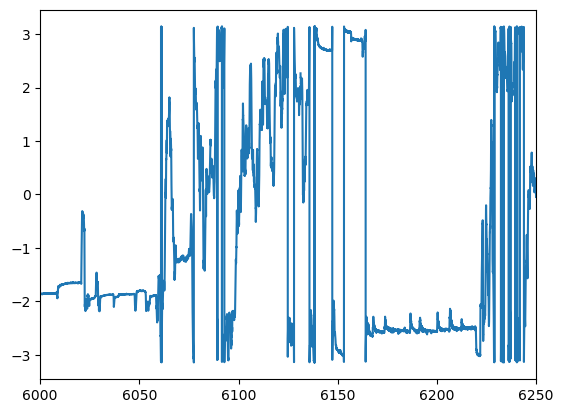

In [164]:
time_hd = angleData['ang']['t']
hd = angleData['ang']['data']
plt.plot(time_hd, hd)
# plt.plot(time_hd, hd)
ax = plt.gca()
ax.set_xlim([6000,6250])


In [165]:
behav_epochs

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Dec 16 14:59:46 2019',
 '__version__': '1.0',
 '__globals__': [],
 'sleep1Ep': {'units': {'quantity': 'time', 'unit': 'ts', 'value': 1},
  'start': 5e-05,
  'stop': 4668.876},
 'sleep1Ep_Info': 'No info',
 'wake1Ep': {'units': {'quantity': 'time', 'unit': 'ts', 'value': 1},
  'start': 4668.876,
  'stop': 7085.484},
 'wake1Ep_Info': 'No info',
 'sleep2Ep': {'units': {'quantity': 'time', 'unit': 'ts', 'value': 1},
  'start': 7085.484,
  'stop': 11189.59},
 'sleep2Ep_Info': 'No info',
 'wake2Ep': {'units': {'quantity': 'time', 'unit': 'ts', 'value': 1},
  'start': 11189.59,
  'stop': 13327.16},
 'wake2Ep_Info': 'No info'}

In [102]:
behav_epochs['wake1Ep']['start']

3853.044

In [194]:

wake_epochs = nap.IntervalSet(start=[behav_epochs['wake1Ep']['start'], behav_epochs['wake2Ep']['start']], end=[behav_epochs['wake1Ep']['stop'], behav_epochs['wake2Ep']['stop']])
sleep_epochs = nap.IntervalSet(start=[behav_epochs['sleep1Ep']['start'], behav_epochs['sleep2Ep']['start']], end=[behav_epochs['sleep1Ep']['stop'], behav_epochs['sleep2Ep']['stop']])

In [167]:
spikeData.keys()

dict_keys(['__header__', '__version__', '__globals__', 'S', 'S_Info', 'shank', 'shank_Info', 'cellIx', 'cellIx_Info'])

In [168]:
sp_times = spikeData["S"]['C']
cell_ids = spikeData["cellIx"]
len(sp_times) == len(cell_ids)

True

In [169]:
sp_times[0]['tsd']['t']

array([3.24655000e+00, 5.31725000e+00, 5.52910000e+00, ...,
       1.33174961e+04, 1.33175223e+04, 1.33255504e+04])

In [195]:
spData = {

    cell_id:nap.Ts(t=sp_times[cell_ind]['tsd']['t']) for cell_ind,cell_id in enumerate(cell_ids)

}
sp_times_wake = nap.TsGroup(spData, time_support=wake_epochs)
sp_times_sleep = nap.TsGroup(spData, time_support=sleep_epochs)

In [96]:

# crosscorrs = nap.compute_crosscorrelogram(group = sp_times_group, binsize=100, windowsize=1000, time_units="ms")
# print(crosscorrs)

In [196]:
tuning_curve_wake = nap.compute_1d_tuning_curves(

    group = sp_times_wake,
    feature=head_direction,
    nb_bins=120,
    minmax=(-np.pi, np.pi)
)

tuning_curve_sleep = nap.compute_1d_tuning_curves(
    group = sp_times_sleep,
    feature=head_direction,
    nb_bins=120,
    minmax=(-np.pi, np.pi)
)

# print(tuning_curve)

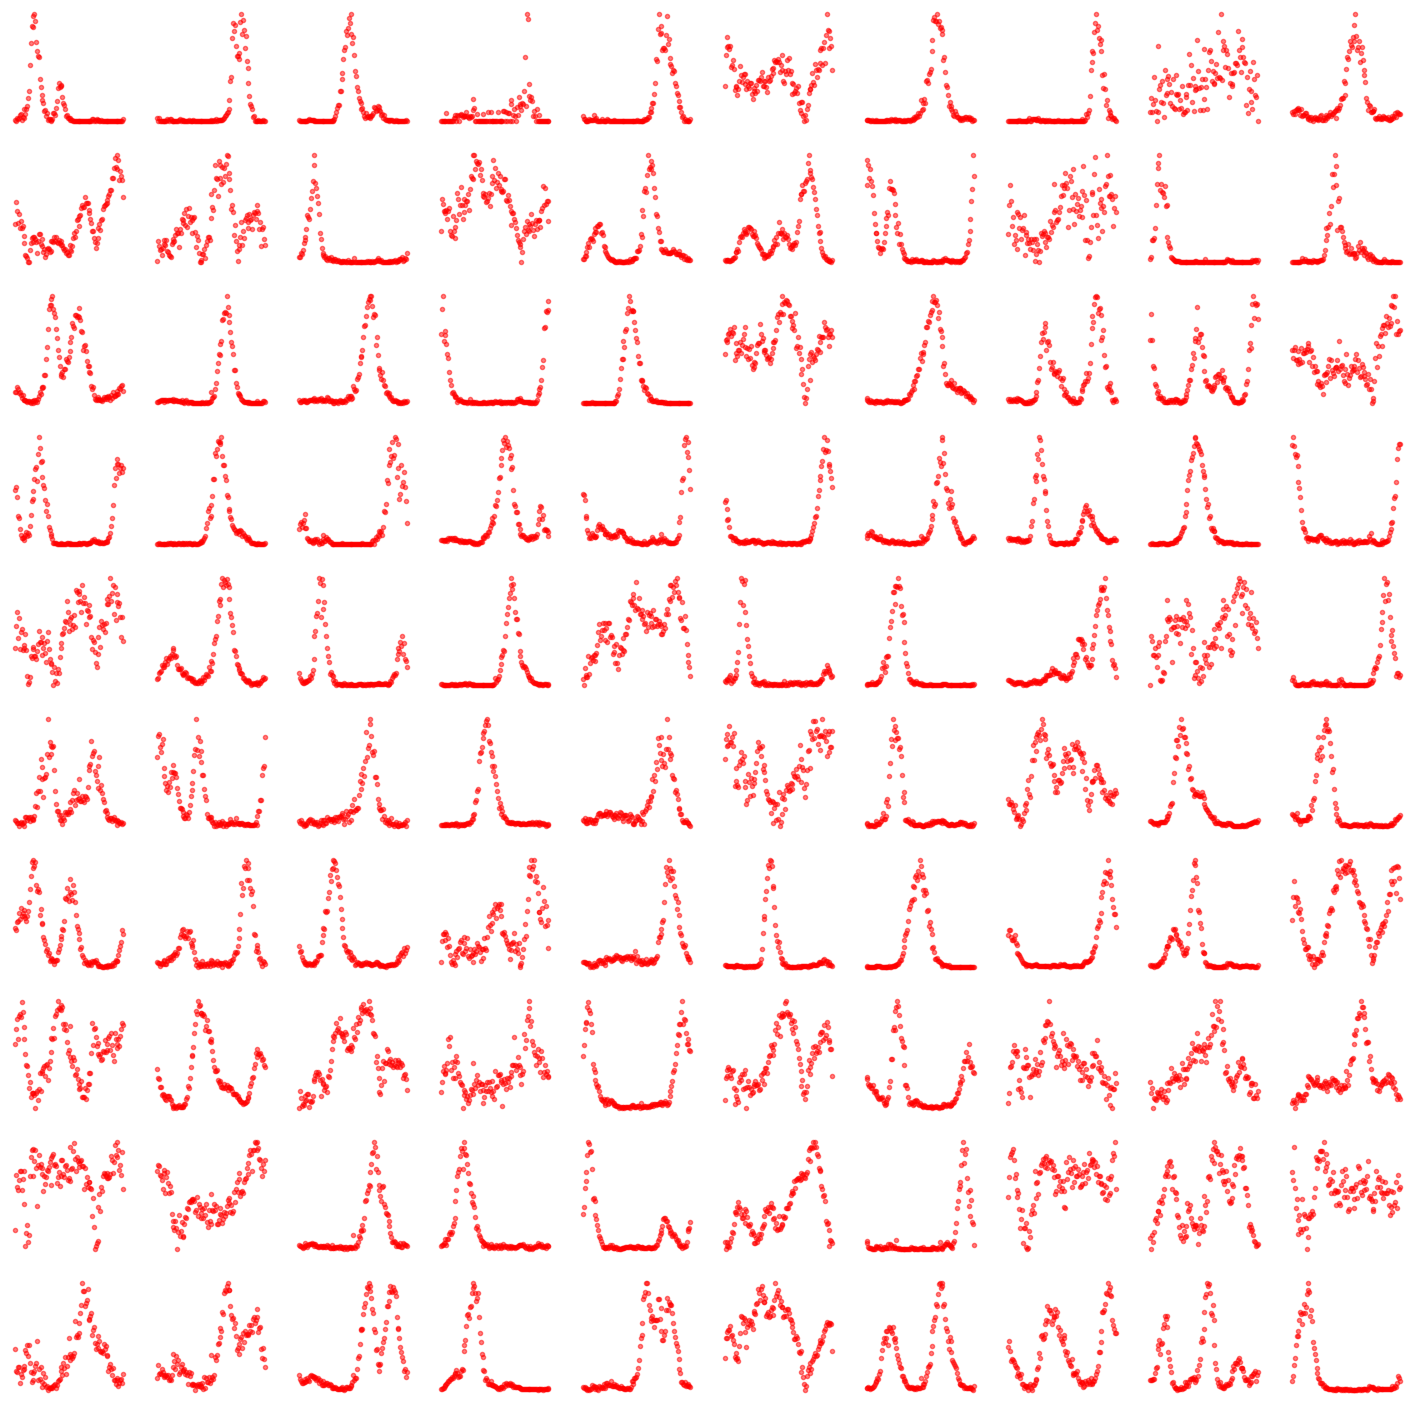

In [199]:
fig, axes = plt.subplots(10,10, figsize=(18,18), subplot_kw={'facecolor':'#ebf5ff'})

in_tune = 2
for i_ax in range(10):
    for j_ax in range(10):
        in_tune += 1
        axes[i_ax, j_ax].scatter(tuning_curve_wake[in_tune].axes[0].tolist(), tuning_curve_wake[in_tune].tolist(), c='r', marker='.', plotnonfinite=True, alpha=0.5)
        # axes[i_ax, j_ax].scatter(tuning_curve_sleep[in_tune].axes[0].tolist(), tuning_curve_sleep[in_tune].tolist(), c='k', marker='.', plotnonfinite=True, alpha=0.5)
        axes[i_ax, j_ax].set_axis_off()
        



In [ ]:

velocity['vel']

{'time_unit': {'t': 'time_units',
  'units': {'quantity': 'time', 'unit': 'ts', 'value': 1}},
 'data_unit': array([], dtype=uint8),
 't': array([ 3856.894,  3856.904,  3856.914, ..., 12637.5  , 12637.51 ,
        12637.52 ]),
 'data': array([3.87127125, 3.94324058, 3.87680473, ..., 7.28697429, 6.06404331,
        4.48291477]),
 'name': array([], dtype='<U1')}

(2000.0, 2010.0)

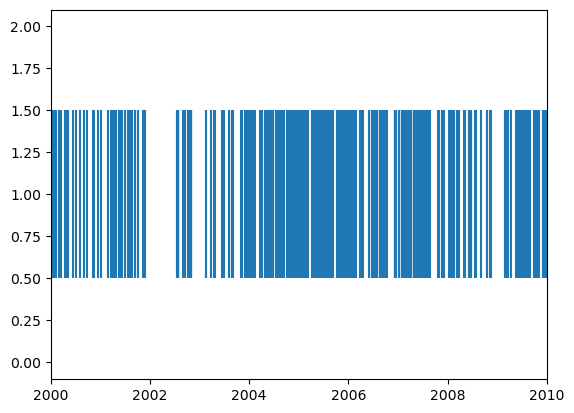

In [14]:
plt.eventplot(sp_times)
ax = plt.gca()
ax.set_xlim([2000,2010])